#                                             Technical Report

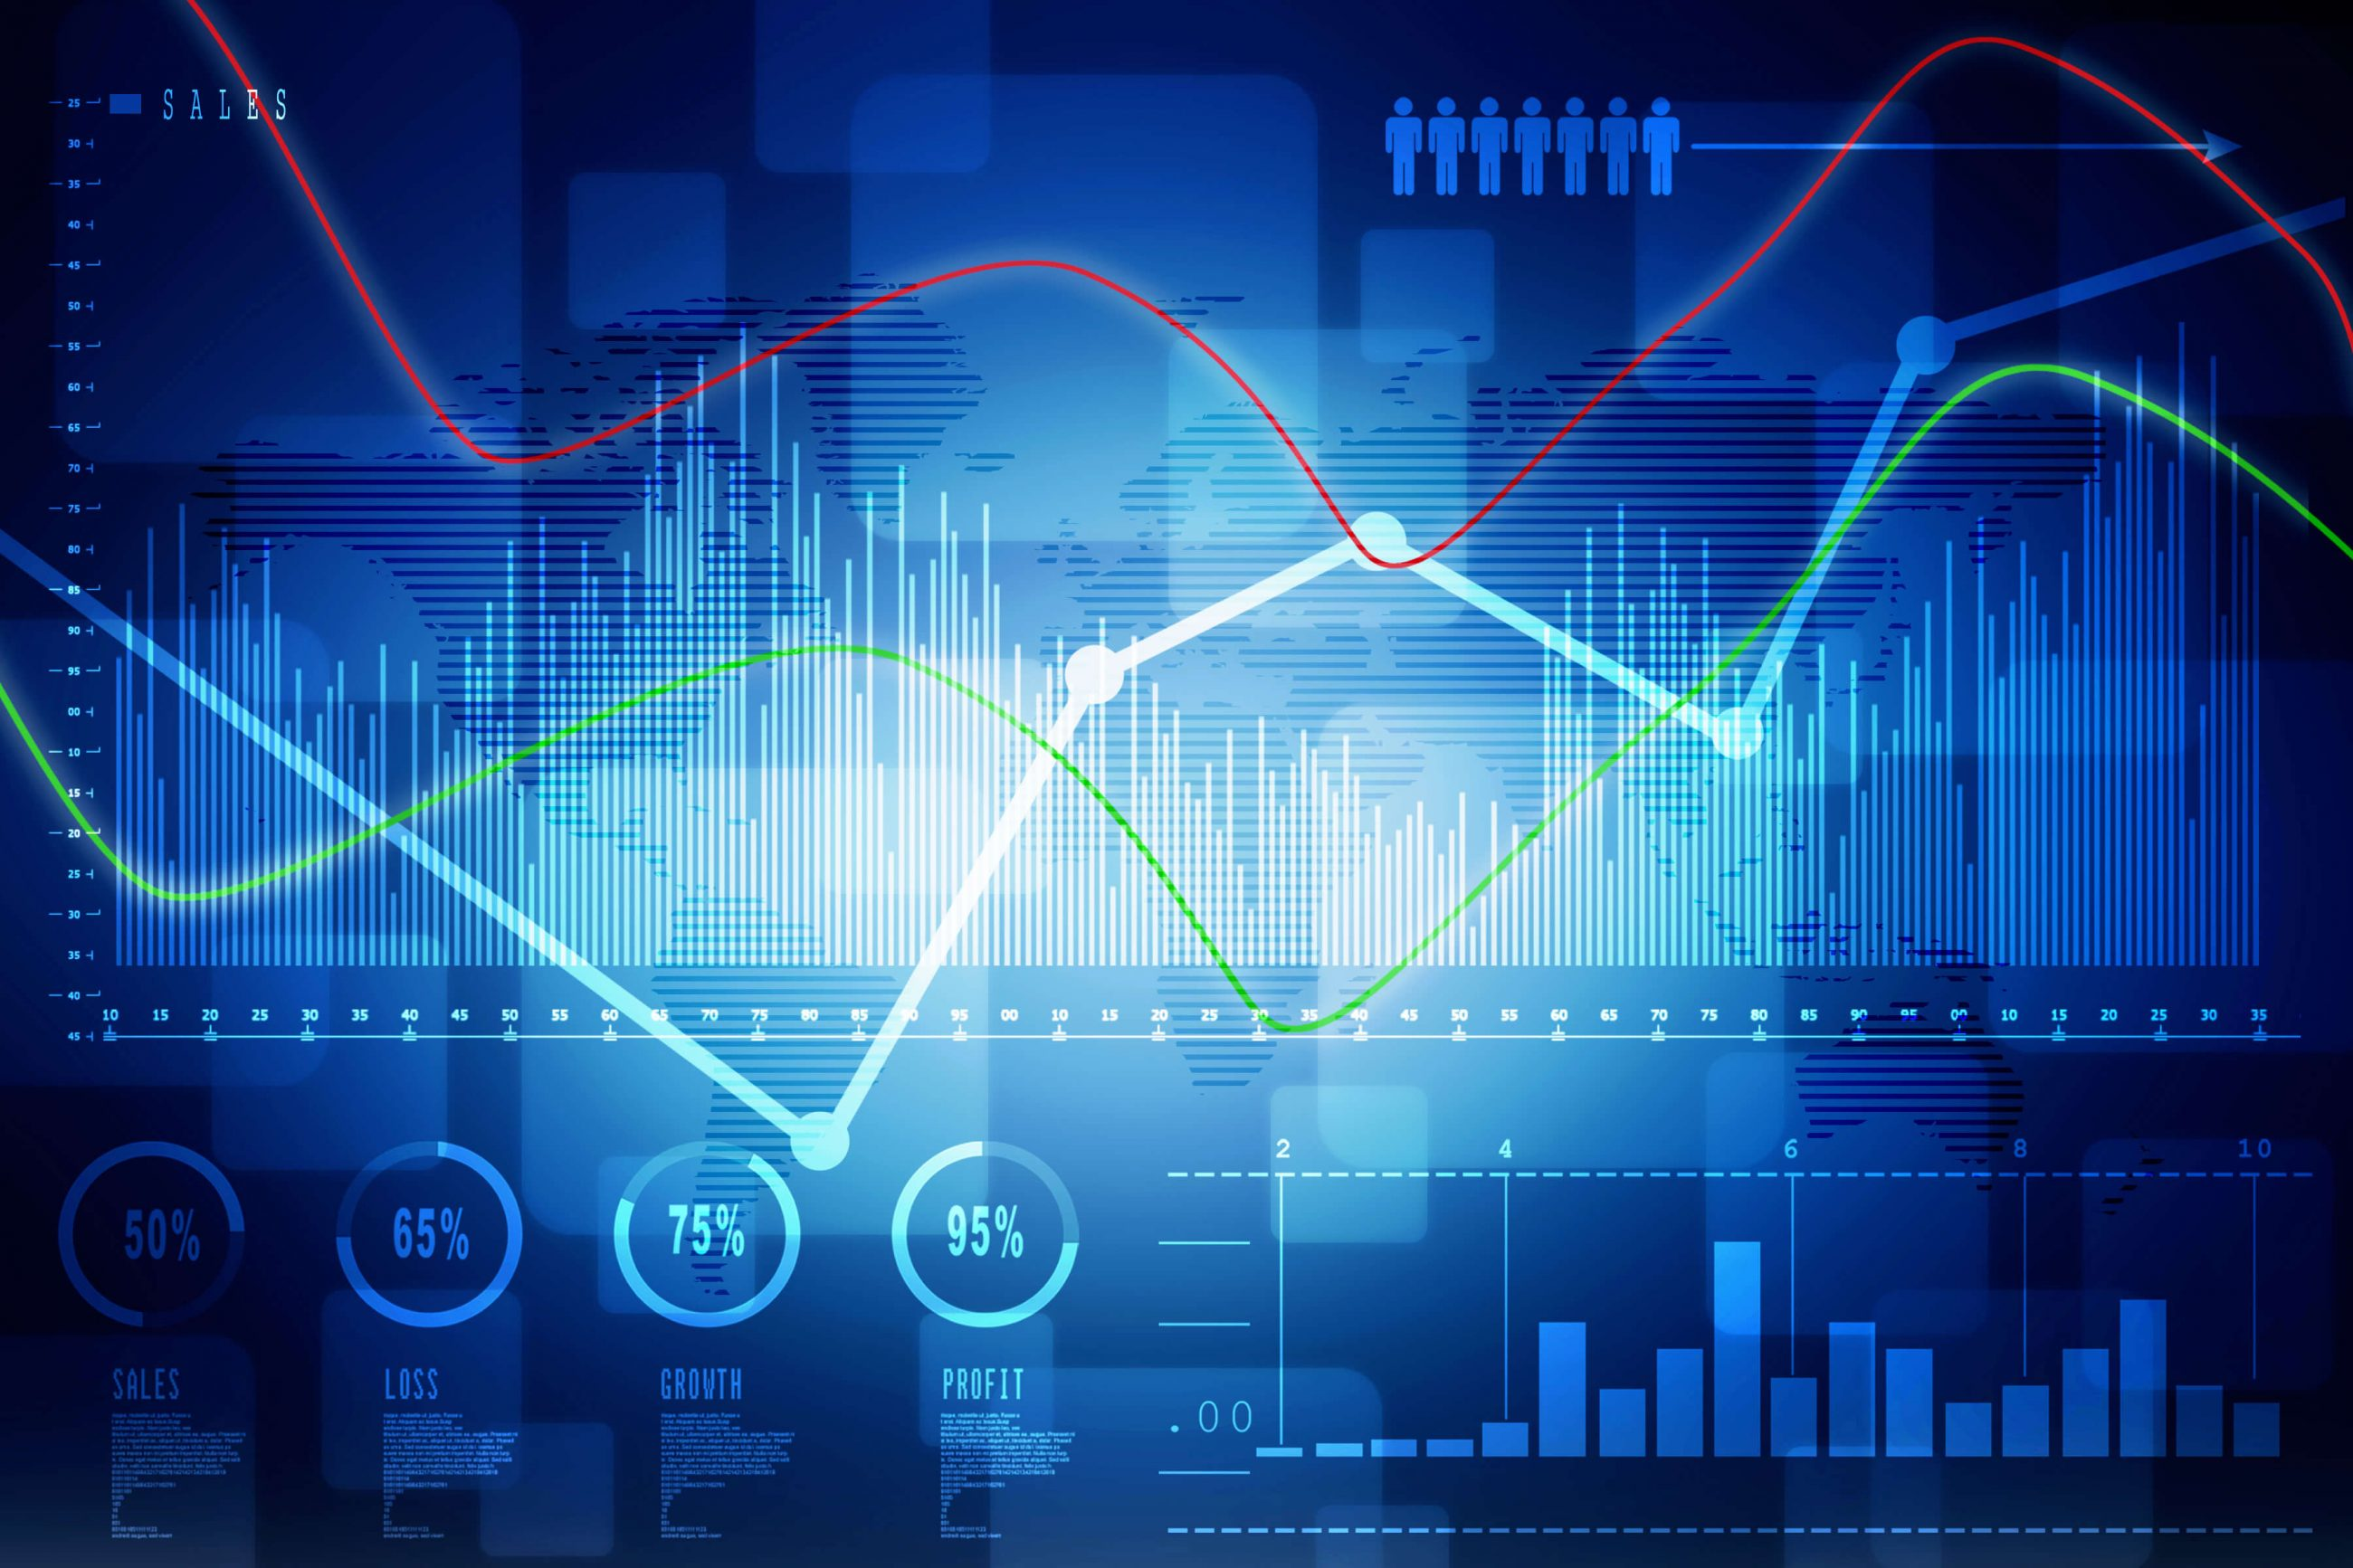

# DATA

```
This first part introduces the three different parts of the data process, retrieval, merge and preprocess. The code is delivered with the GitHub repo for reasons of simplicity and space saving.
```

## Data Retrieval

    For the needs of the project historical electricity price, load and other raw data has been collected from various sources using various methods. The data concerns either Denmark or they are global and the period we focus on is from 2018-2023. By estblishing data pipelines where was possible we are able to retrieve data fast, easy and flexible.  
    
*    **Entsoe Data**: It contains data regarding the day ahead electricity prices, forecasted electricity load	    actual electricity load and also wind and solar forecasting electricity load. In aditions we retrieve data for both the imports and the exports of electricity load to and from Denmark. Making use of Entsoe's API we manage to build data pipelines to retreive the kind and the period of the data we want. 
*    **Yahoo Finance Data and Investing.com**: In the case of Yahoo we make use of their api to retrieve the prices of gas futures as index of thei cost, including it in our data pipeline. Regarding Investing.com manual has downloaded data for the prices of coal and CO2, since it was not available through Yahoo and there is no API for Investing.com
*    **Electricity Map**: Manually downloaded data for the energy sources of Denmark, both renewable and non-renewable. Their API don't provide them and we had to ask through email for them. They will be used for the energy mix analysis and prediction.

## Data Merging

        In this part a merging pipeline has been implemented to combine all the necessary data of all sources in one dataset, which will be the main dataset for the purposes of main analysis and modelling after the necessary preprocessing. We mainly care for the Entsoe Data, the price data and the renewable sources data from Electricity Maps. In this step we also deal with the problems of time aggregation, time zone and also how the different data should be merged all together. The main problem was the different time of the observations in many cases where we decided to keep them in hourly base.

## Data Preprocessing

```
    The preprocessing of the data mainly tackles the problem of the NaN values, the inconsistncy of the data or the lack of continuity and how it should be solved. An analysis to discover the reason of the NaN values led us to the decision of using both forward fill for some of them but also the moving roll. The fill forward mainly adress to price features with daily values but not hourly, on the other hand the moving roll is for hourly values that lacks of entries. In addition, a few new columns have been created as it is necessary for the models to access and understand their meaning like the timestamp data.

    All in all, lags of the day ahead electricity price has been. After an analysis about the possible laggs, we ended up to the conclusion that the most important are lags 24, 36, 48, 72 and 168. All the lags corresponds to the future.

Based on this final process we have created our last clean and clean with lags dataset.


```

# Exploratory Analysis

In [1]:
import pandas as pd

In [23]:
import os
import sys

In [26]:
%%capture
%load_ext autoreload
%autoreload 2
from __init__ import root_dir, data_path

In [30]:
sys.path.append(os.path.join(root_dir,'models'))
from helper import read_our_data

In [31]:
df = read_our_data('clean_lagged.csv')

In [33]:
df.head()

,Timestamp,DK_1_imports,SE_4_imports,DK_1_exports,SE_4_exports,Day_Ahead_price,Forecasted_Load,Actual_Load,Solar_[MW],ttf_price,...,Hour,Week,business,Wind Total,DAP-lag24,DAP-lag36,DAP-lag48,DAP-lag72,DAP-lag168,DAP-lag-168
0,2018-01-02 00:00:00,383.0,0.0,0.0,808.0,18.12,1258.0,1245.0,0.0,19.32,...,0,1,True,429.0,NaN,NaN,NaN,NaN,NaN,27.17
1,2018-01-02 01:00:00,589.0,0.0,0.0,1019.0,14.99,1188.0,1203.0,0.0,19.32,...,1,1,True,375.0,NaN,NaN,NaN,NaN,NaN,22.10
2,2018-01-02 02:00:00,557.0,0.0,0.0,926.0,17.79,1167.0,1178.0,0.0,19.32,...,2,1,True,313.0,NaN,NaN,NaN,NaN,NaN,9.79
3,2018-01-02 03:00:00,487.0,0.0,0.0,784.0,24.51,1187.0,1180.0,0.0,19.32,...,3,1,True,229.0,NaN,NaN,NaN,NaN,NaN,4.99
4,2018-01-02 04:00:00,580.0,0.0,0.0,756.0,17.82,1235.0,1247.0,0.0,19.32,...,4,1,True,175.0,NaN,NaN,NaN,NaN,NaN,9.24


# Visualizations

## Yearly plots for all Renewable Sources Stacked

This helps is see how much the different sources add over time.

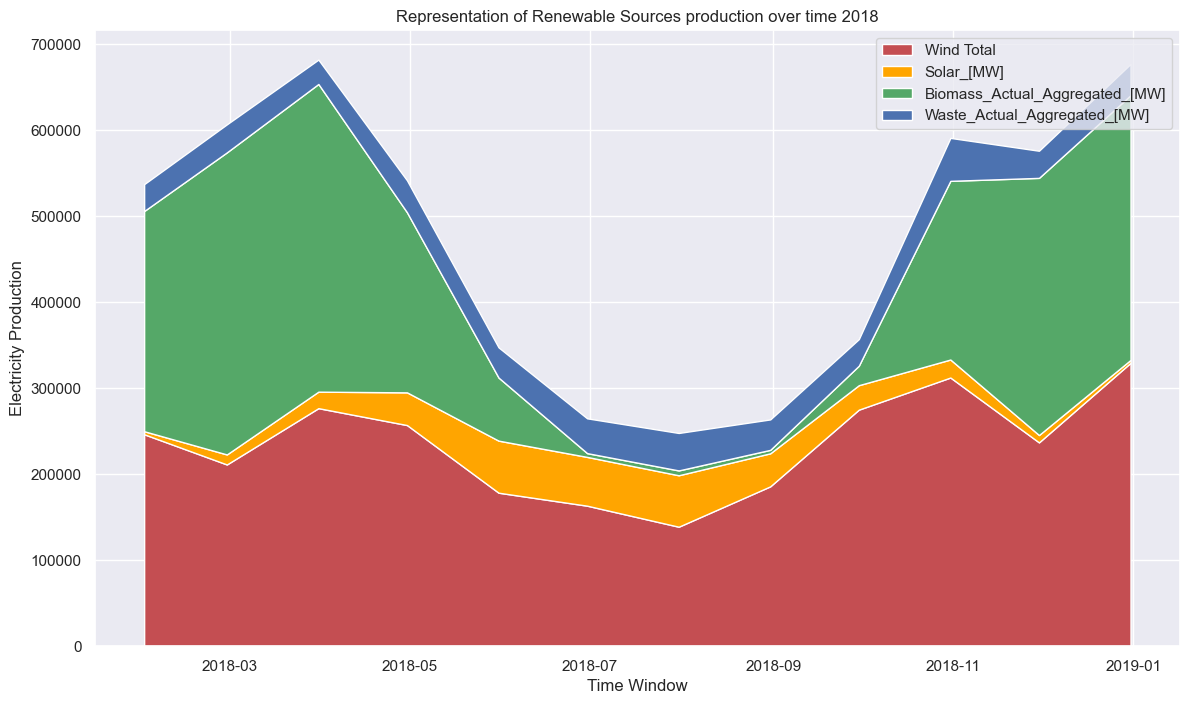

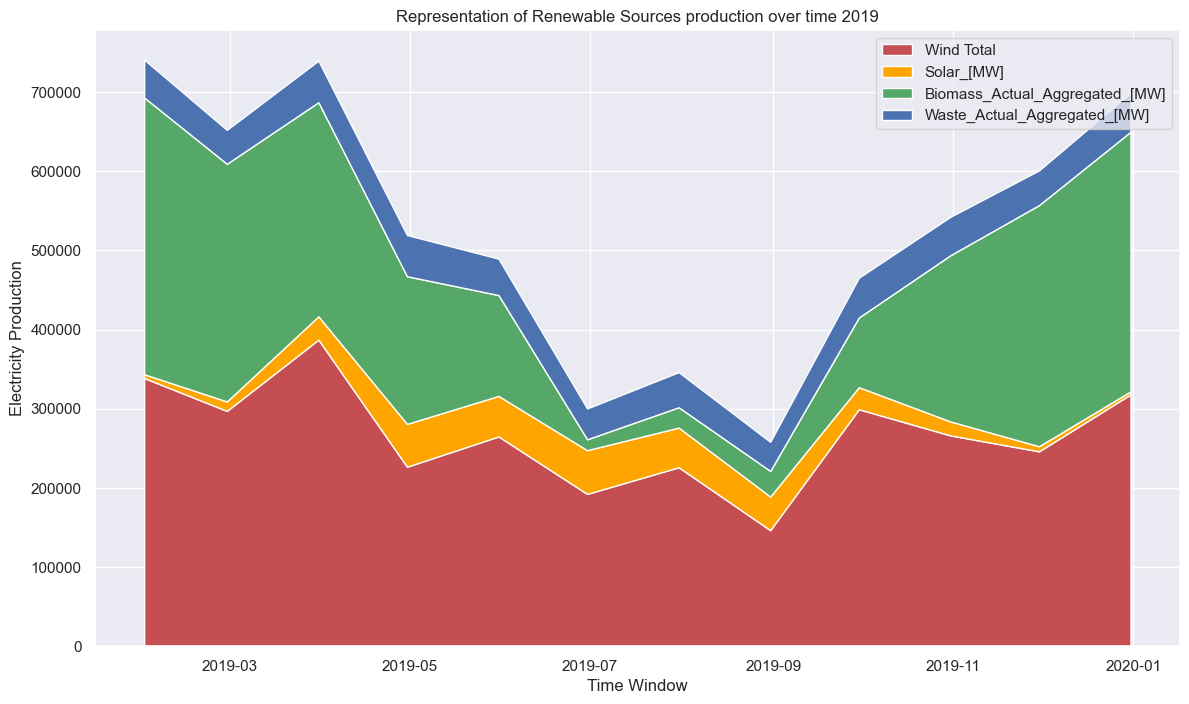

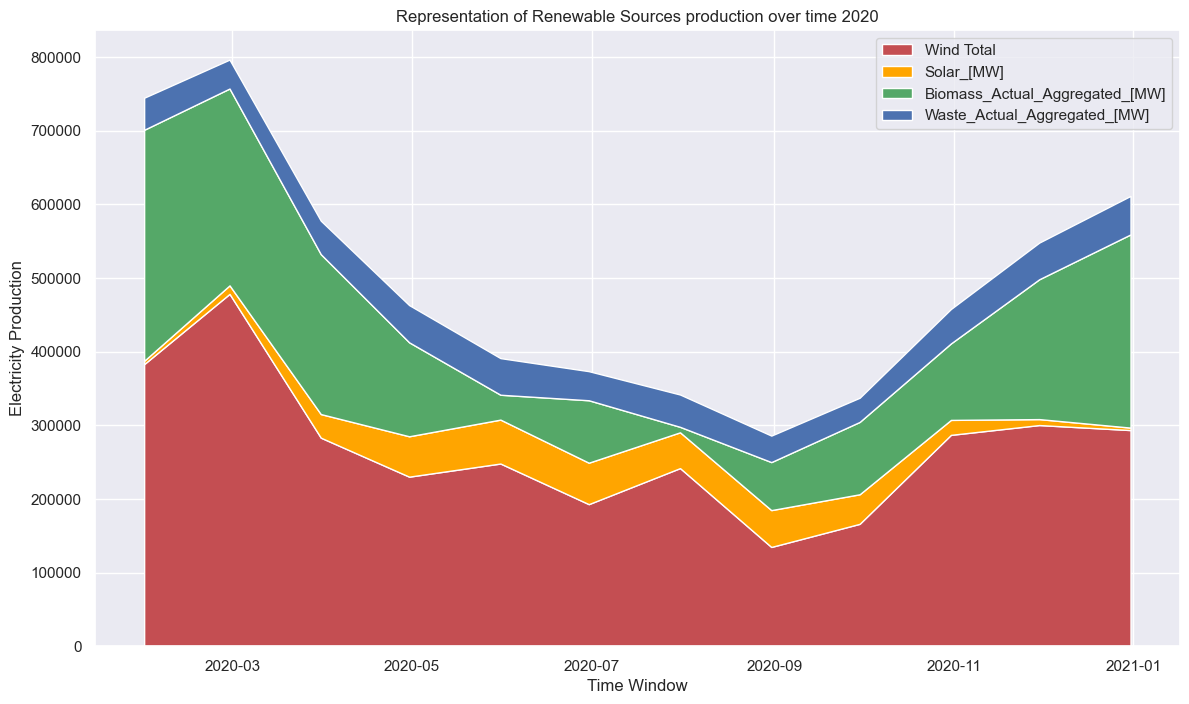

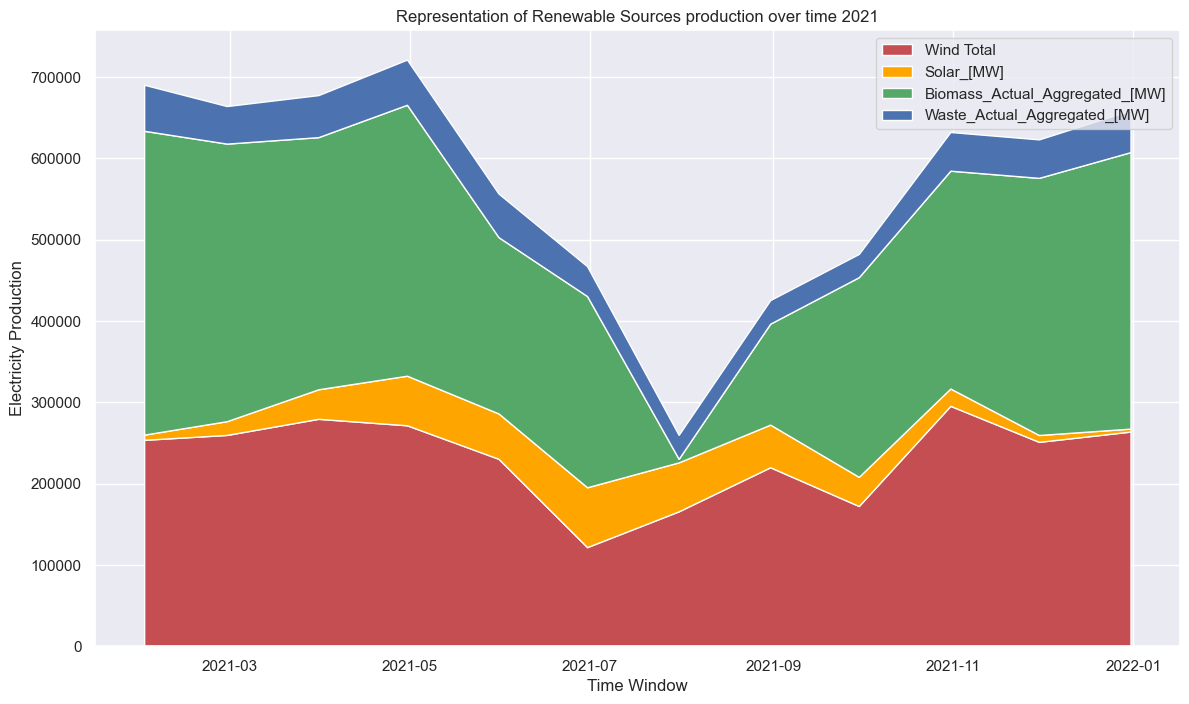

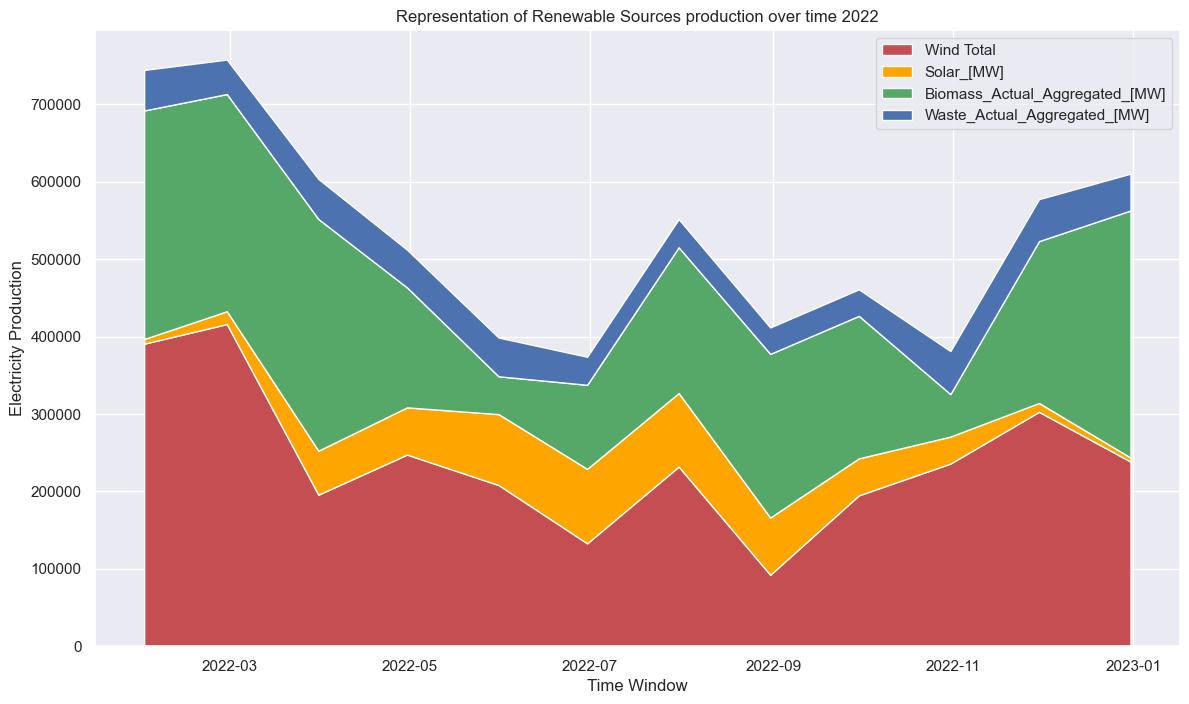

In [5]:
from IPython.core.display import HTML
from IPython.display import IFrame


# Interactive Visualizations
You can select the year and other sources you would like to see

### Day Ahead Prices over time

In [10]:
IFrame(src='./Day Ahead Price in Time.html', width=1000, height=800)

### Total Energy needed and Renewable Production

In [9]:
IFrame(src='./Load + Renewables.html', width=1000, height=800)


### Total Renewables for every 2 months over the whole time

In [13]:
IFrame(src='./Monthly_renewables.html', width=1000, height=700)

### Renewables in Seperate form and format vs Actual Load needed

In [12]:
IFrame(src='./Renewables_Seperate.html', width=1000, height=700)

### Total Energy and Renewable Sources over Time Period and the Needed total Electricity Load

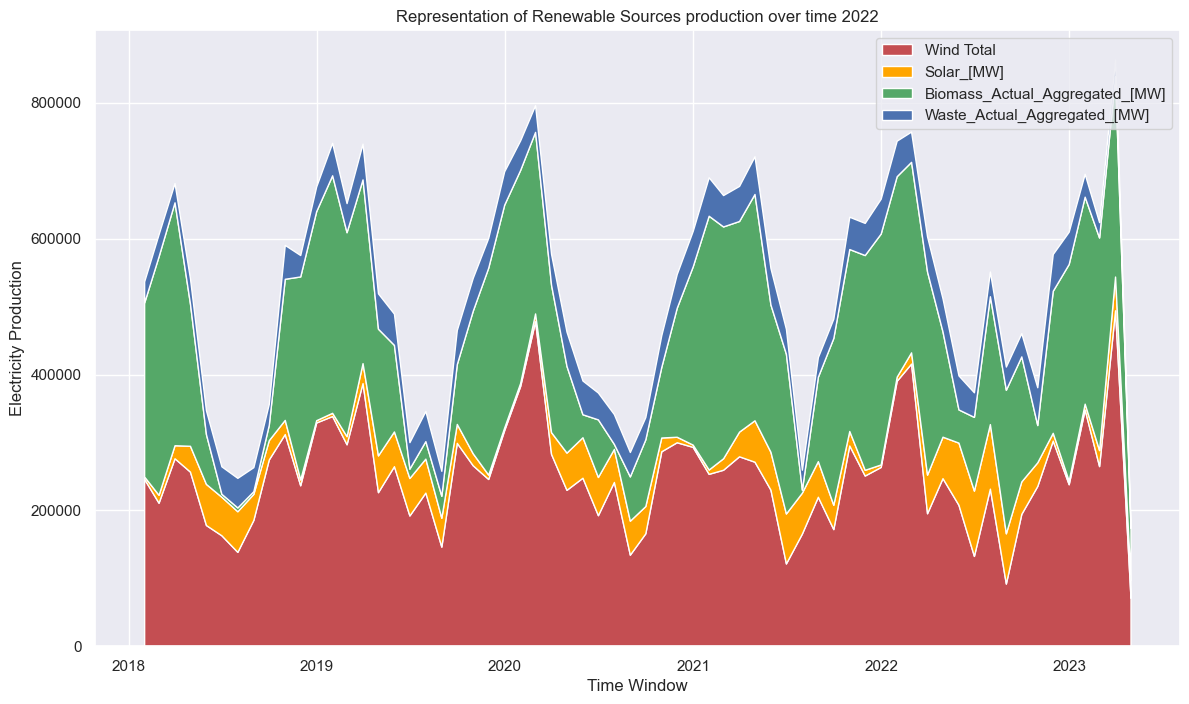

### Quarterly Price for each hour of the Day

This example shoes the massive increase in price for each our in the First Quarter of 2022
All the other Quarters are in the Visualization Notebook, we tried to keep it short.

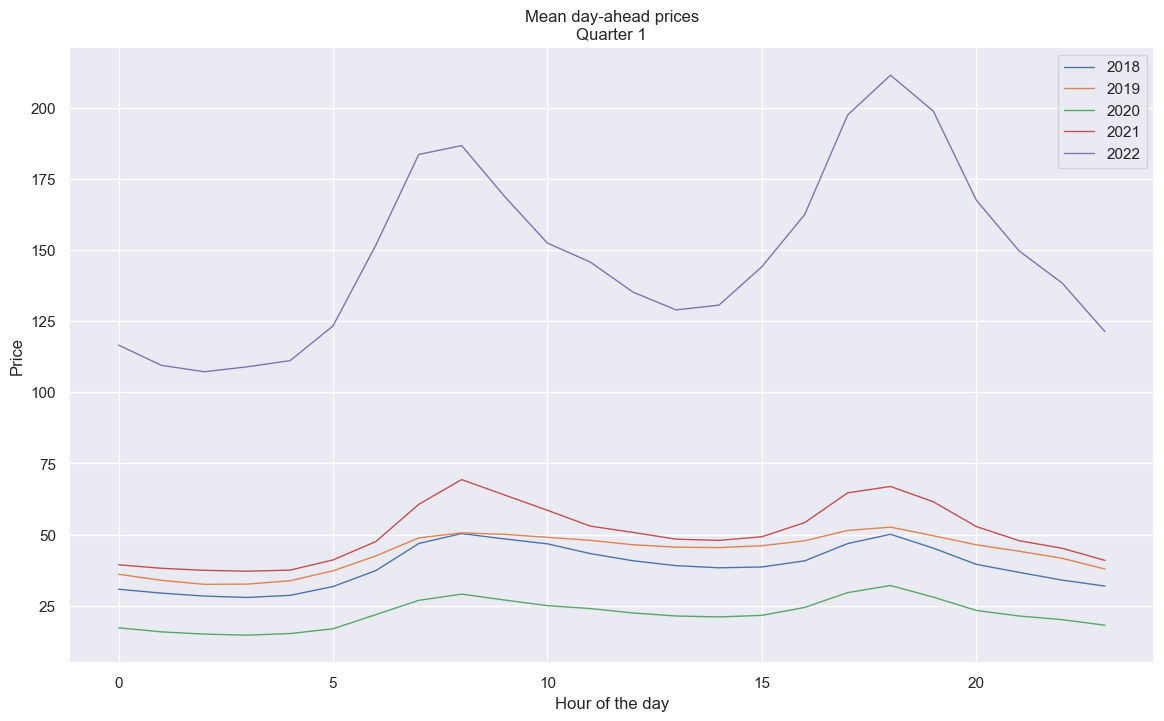

# Monthly Average of Electricity Price

This plot can help us see the trend each for the years and the average price for each month, highlighting thus the seasonality of the data

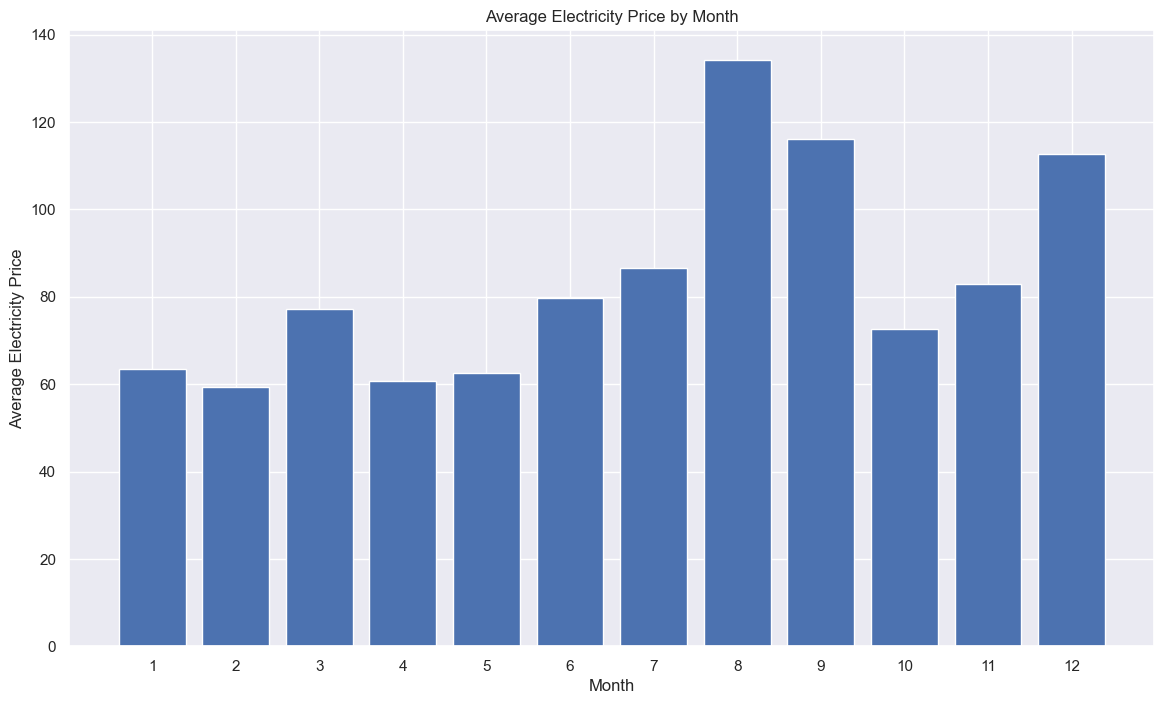